Train shape: (147857, 3)
Val shape: (31684, 3)
Test shape: (31684, 3)
                                                text  emotion    risk
0  two supposedly separate accounts created a day...    angry  normal
1  of all of the fan-favorites from each city, [n...  neutral  normal
2  this is hilarious! please share if she tells u...  neutral  normal
3             i wonder how [name] prepares his food.  neutral  normal
4                                       oh [name]...  neutral  normal

=== Emotion Distribution (Train) ===
emotion
neutral     104033
happy        15878
angry        13873
stressed      6032
sad           5111
anxious       2930
Name: count, dtype: int64

=== Risk Distribution (Train) ===
risk
normal     133771
warning     14061
crisis         25
Name: count, dtype: int64


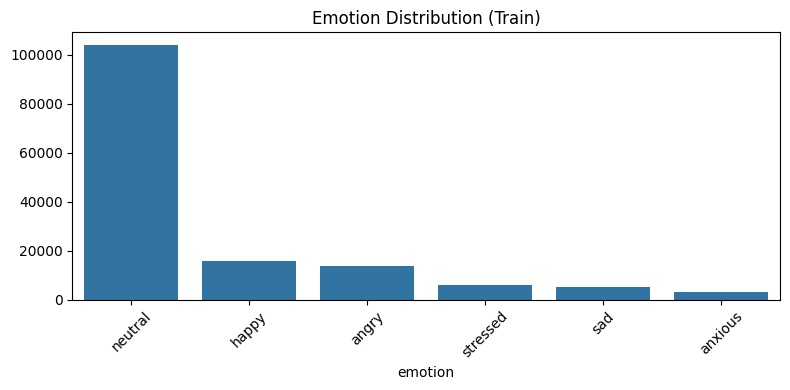

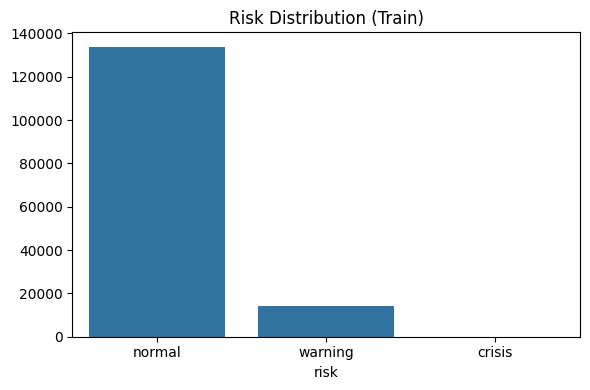


=== Example Sentences by Emotion ===
[angry] -> two supposedly separate accounts created a day apart both misspell "faggot" the same way. same dude confirmed.
[neutral] -> of all of the fan-favorites from each city, [name] being the fan-favorite confuses and annoys me most. her headlines are becoming insufferable.
[stressed] -> was less worried about spelling and more worried about warning everyone in the match
[happy] -> i hope so. either [name] or [name] deserve it the most
[sad] -> good point. thank you. my condolences for your own loss.
[anxious] -> entire new coaching philosophy is needed. enough wasted possessions, contested iso mid-range jumpers with 15 seconds left on the shot clock and terrible 3pt defense.

 EMOTION CLASSIFICATION 

[Logistic Regression]
              precision    recall  f1-score   support

       angry       0.55      0.18      0.27      2973
     anxious       0.58      0.18      0.27       628
       happy       0.63      0.33      0.44      3402
     ne

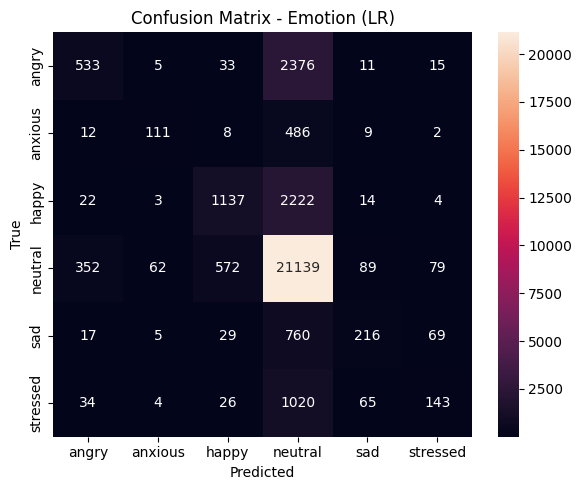

In [2]:
    # ===============================
# STEP 2: DATA ANALYSIS & NLP BASELINE
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# ===============================
# 1. LOAD DATA
# ===============================
train_df = pd.read_csv("../data/train/train.csv")
val_df   = pd.read_csv("../data/val/val.csv")
test_df  = pd.read_csv("../data/test/test.csv")

print("Train shape:", train_df.shape)
print("Val shape:", val_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())

# ===============================
# 2. DATA STATISTICS
# ===============================
print("\n=== Emotion Distribution (Train) ===")
emotion_counts = train_df["emotion"].value_counts()
print(emotion_counts)

print("\n=== Risk Distribution (Train) ===")
risk_counts = train_df["risk"].value_counts()
print(risk_counts)

# ===============================
# 3. VISUALIZATION
# ===============================
plt.figure(figsize=(8,4))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title("Emotion Distribution (Train)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=risk_counts.index, y=risk_counts.values)
plt.title("Risk Distribution (Train)")
plt.tight_layout()
plt.show()

# ===============================
# 4. EXAMPLE SENTENCES
# ===============================
print("\n=== Example Sentences by Emotion ===")
for emo in train_df["emotion"].unique():
    example = train_df[train_df["emotion"] == emo]["text"].iloc[0]
    print(f"[{emo}] -> {example}")

# ===============================
# 5. TEXT VECTORIZATION (TF-IDF)
# ===============================
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    max_features=20000,
    ngram_range=(1,2)
)

X_train = vectorizer.fit_transform(train_df["text"])
X_val   = vectorizer.transform(val_df["text"])
X_test  = vectorizer.transform(test_df["text"])

# ===============================
# PART A: EMOTION CLASSIFICATION
# ===============================
y_train_emo = train_df["emotion"]
y_val_emo   = val_df["emotion"]
y_test_emo  = test_df["emotion"]

print("\n===============================")
print(" EMOTION CLASSIFICATION ")
print("===============================")

# --- Logistic Regression ---
emo_lr = LogisticRegression(max_iter=1000)
emo_lr.fit(X_train, y_train_emo)
emo_pred = emo_lr.predict(X_test)

print("\n[Logistic Regression]")
print(classification_report(y_test_emo, emo_pred))

# --- SVM ---
emo_svm = LinearSVC()
emo_svm.fit(X_train, y_train_emo)
emo_pred_svm = emo_svm.predict(X_test)

print("\n[SVM]")
print(classification_report(y_test_emo, emo_pred_svm))

# --- Naive Bayes ---
emo_nb = MultinomialNB()
emo_nb.fit(X_train, y_train_emo)
emo_pred_nb = emo_nb.predict(X_test)

print("\n[Naive Bayes]")
print(classification_report(y_test_emo, emo_pred_nb))

# ===============================
# PART B: RISK CLASSIFICATION
# ===============================
y_train_risk = train_df["risk"]
y_val_risk   = val_df["risk"]
y_test_risk  = test_df["risk"]

print("\n===============================")
print(" RISK CLASSIFICATION ")
print("===============================")

risk_lr = LogisticRegression(max_iter=1000)
risk_lr.fit(X_train, y_train_risk)
risk_pred = risk_lr.predict(X_test)

print("\n[Logistic Regression]")
print(classification_report(y_test_risk, risk_pred))

# ===============================
# 6. CONFUSION MATRIX (OPTIONAL)
# ===============================
cm = confusion_matrix(y_test_emo, emo_pred, labels=emo_lr.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=emo_lr.classes_,
            yticklabels=emo_lr.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Emotion (LR)")
plt.tight_layout()
plt.show()
